In [1]:
import matplotlib.pyplot as plt
import numpy as np
name = []
user_answers = []
response_time = []
ind_switch = []
task = []
trial_target = []
data = []

with open("ExperimentalResults514.tsv", "r") as f:
    for line in f:
        splitted = line.split("\t")
        data.append([splitted[0], splitted[1], splitted[2], splitted[3], splitted[4], splitted[5], splitted[6]])

In [2]:
data[0]

['Name',
 'User Answers',
 'Response Time (ms)',
 'Ind Switch',
 'Task',
 'Trial Target',
 'Date/Time']

In [3]:
def correct_responses(data):
    name = data[0]
    user_answers = [int(x) for x in data[1].split(',')]
    date = data[6]
    correct = 0
    task = [int(x) for x in data[4].split(',')]
    trial_numbers = [int(x) for x in data[5].split(',')]
    reaction_times = [int(x) for x in data[2].split(',')]
    data_point = []
    # Task 1 is High-Low
    # Task 0 is Odd-Even
    # Input of 0 is didn't answer
    # Input of 1 is Odd/Lower
    # Input of 2 is Even/Higher
    for i in range(len(task)):
        if(task[i] == 0): #Odd or even
            if(trial_numbers[i] % 2 == 0):
                if(user_answers[i] == 2):
                    correct += 1
                    data_point.append([name, reaction_times[i], date, task[i]])
            else:
                if(user_answers[i] == 1):
                    correct += 1
                    data_point.append([name, reaction_times[i], date, task[i]])
        if(task[i] == 1): # High or Low
            if(trial_numbers[i] > 5):
                if(user_answers[i] == 2):
                    correct += 1
                    data_point.append([name, reaction_times[i], date, task[i]])
            else:
                if(user_answers[i] == 1):
                    correct += 1
                    data_point.append([name, reaction_times[i], date, task[i]])
    print("Name: "+str(name))
    print("Date: "+str(date))
    print("Correct: "+str(correct))
    print("Pct: "+str(100 * correct/len(task))+"%")
    print("")
    return data_point

def export_to_SAS_format(data):
    print("Copy to SAS")
    print("-------------------------------------------------")
    print("input person reactiontime task;")
    print("datalines;")
    unique_names = np.unique([d[0].split("-")[0] for d in data])
    reverse_map_name = {k:str(v) for v,k in enumerate(unique_names)}
    unique_dates = np.unique([d[2] for d in data])
    reverse_map_dates = {k:str(v) for v,k in enumerate(unique_dates)}
    #print(reverse_map_name)
    for d in data:
        print(reverse_map_name[d[0].split("-")[0]]+","+str(d[1])+","+reverse_map_dates[d[2]])
    print(";")
    print("-------------------------------------------------")
    print(reverse_map_name)
    print(reverse_map_dates)

In [4]:
final_data_points = []
for d in data:
    if("test" not in d[0].lower() and 'Name' not in d[0]):
        final_data_points += correct_responses(d)
SAS_format = export_to_SAS_format(final_data_points)

Name: Chloe-NoExercise
Date: 2023-11-27T20:39:13.568Z
Correct: 26
Pct: 96.29629629629629%

Name: Chloe-NoExercise
Date: 2023-11-27T20:40:56.676Z
Correct: 26
Pct: 96.29629629629629%

Name: Chloe-Anaerobic
Date: 2023-11-29T19:17:30.703Z
Correct: 27
Pct: 100.0%

Name: Chloe-Aerobic
Date: 2023-12-01T17:57:50.016Z
Correct: 27
Pct: 100.0%

Name: Brandon-aerobic
Date: 2023-12-06T02:00:08.615Z
Correct: 25
Pct: 92.5925925925926%

Name: Brandon-aerobic
Date: 2023-12-06T02:00:37.266Z
Correct: 25
Pct: 92.5925925925926%

Name: WillBrown-aerobic
Date: 2023-12-06T02:21:39.832Z
Correct: 26
Pct: 96.29629629629629%

Name: JRD-aerobic
Date: 2023-12-06T02:23:56.644Z
Correct: 26
Pct: 96.29629629629629%

Name: YD-aerobic
Date: 2023-12-06T02:25:59.473Z
Correct: 26
Pct: 96.29629629629629%

Name: WillBrown-anaerobic
Date: 2023-12-06T03:45:43.285Z
Correct: 26
Pct: 96.29629629629629%

Name: JRD-anaerobic
Date: 2023-12-06T03:47:30.244Z
Correct: 23
Pct: 85.18518518518519%

Name: YD-anaerobic
Date: 2023-12-06T03:49

In [5]:
final_data_points[0]

['Chloe-NoExercise', 1600, '2023-11-27T20:39:13.568Z', 1]

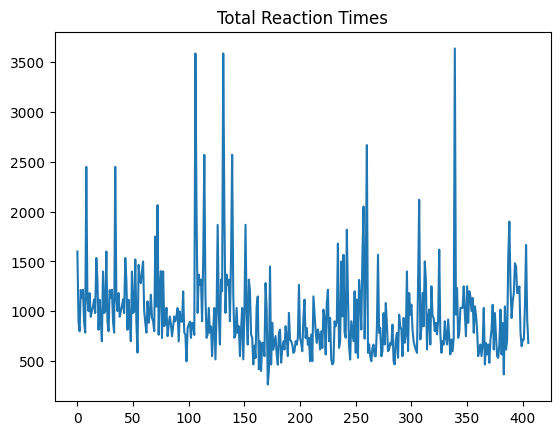

In [10]:
plt.title("Total Reaction Times")
plt.plot([x[1] for x in final_data_points])

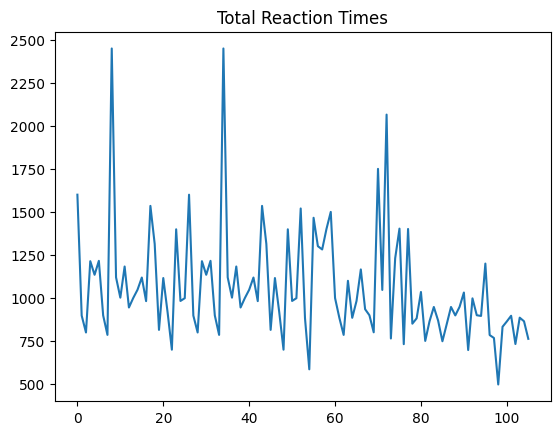

In [11]:
plt.title("Total Reaction Times (Only Chloe)")
plt.plot([x[1] for x in final_data_points if "Chloe" in x[0]])

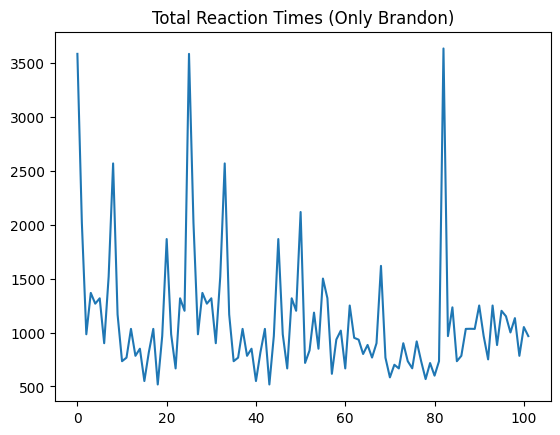

In [12]:
plt.title("Total Reaction Times (Only Brandon)")
plt.plot([x[1] for x in final_data_points if "Brandon" in x[0]])